In [66]:
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import scipy as scipy
from scipy import optimize
from matplotlib.pyplot import cm

In [67]:
#np.loadtxt('../data/NIST/S I.txt', delimiter=';',dtype=object)
data = pd.read_csv('../data/NIST/S I.txt', delimiter = ",")
hdulist = fits.open('../data/composite_Io_eclipsed.fits')
evt_data = Table(hdulist[1].data)
image_data = hdulist[1].data
df = pd.read_csv('../data/Io_Master_Line_List (1).csv') #spaces in csv file will make df object type and not float64
line = "S I"
target_mask = df.Species.str.endswith(line) #probably a better function but idk it right now
df = df[target_mask]
df_wavelength = df['Wavelength']
df_species = df['Species']

In [68]:
def gaussian(x, mu, sig, A):
    return A*np.exp(-(x-mu)**2/(2*sig**2))

In [69]:
array = pd.read_csv('../data/least_squares_array.csv') #spaces in csv file will make df object type and not float64
array = array.loc[array['Species'].str.endswith('S I')]
guess = array.to_numpy()
wl = evt_data['WAVELENGTH'].T
flux = evt_data['FLUX'].T
wl = wl.data
flux = flux.data
wl = wl.flatten()
flux = flux.flatten()
C = np.delete(guess, 1, 1)
C = C.tolist()

In [70]:
x = 46
errfunc1 = lambda p, x, y: (gaussian(x, *p) - y)**2
guess1 = C[x]
guess1

[1425.03, 0.23, 2e-14]

In [71]:
optim1, success = optimize.leastsq(errfunc1, guess1, args=(wl, flux))
optim1

array([1.42505141e+03, 1.92907720e-01, 8.74309323e-15])

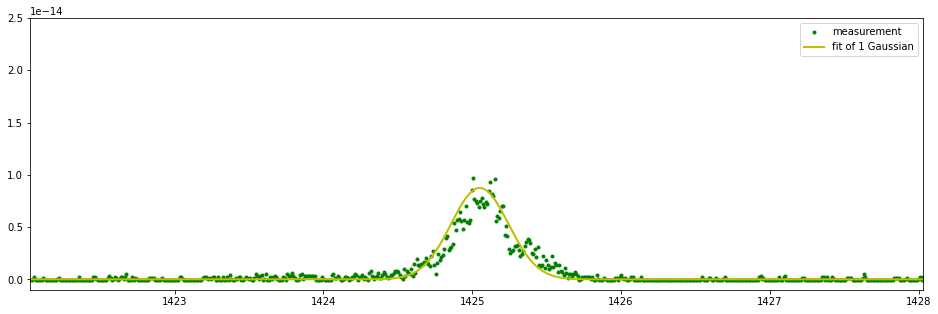

In [72]:
plt.figure(figsize=(16, 5))
plt.plot(wl, flux,'g.', label='measurement')
plt.plot(wl, gaussian(wl, *optim1),
    lw=2, c='y', label='fit of 1 Gaussian')
plt.ylim(-0.01*10**-13,0.25*10**-13)
plt.xlim(guess1[0]-3,guess1[0]+3)
plt.legend(loc='best')

In [76]:
mu = optim1[0]
sig = optim1[1]
amp = optim1[2]

In [77]:
amp

8.743093232932929e-15

In [78]:
brightness = ((2*np.pi)**.5)*(amp*sig)

In [79]:
brightness

4.227704772401919e-15

In [102]:
osc_strength = data['gA(s^-1)'][130]
osc_strength

2650000000.0

In [104]:
ratio = brightness/osc_strength
ratio

1.5953602914724224e-24